In [668]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

In [669]:
raw_data = pd.read_csv("data.csv")

In [670]:
raw_data

,Announce Date,Company,Industry,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Total Voting (MM),Votes per Superior,...,Subject to Shareholder Vote,Stock Change 1-day %,Stock Change 10-day %,Public Float Pre (MM),Public Float Post (MM),% Float Change,Volume Pre (000s),Vol 3mo %,Vol 6mo %,Vol 1yr %
0,31-May-06,Extendicare,REIT,No,No,1884.0,57.1,11.80,68.9,10.0,...,Yes,-6.3,-10.4,57.0,61.0,6.6,307.0,11.0,51.0,32.0
1,14-May-06,Canam Group,Building Products,Yes,No,430.0,47.1,7.00,54.1,5.0,...,Yes,5.9,15.5,57.0,57.0,0.0,81.0,94.0,34.0,21.0
2,13-Dec-05,CoolBrands,Branded Food,Yes,No,50.0,50.0,6.00,56.0,10.0,...,Yes,1.9,14.9,36.0,36.0,0.0,388.0,-74.0,-55.0,-26.0
3,14-Sep-05,ProMetic Life Sciences,Healthcare,Yes,No,51.0,116.5,13.00,129.5,10.0,...,Yes,4.3,-12.8,116.0,116.0,0.0,146.0,69.0,28.0,4.0
4,31-Mar-05,DizA Resources,Metals,Yes,No,41.0,53.8,6.00,61.1,10.0,...,Yes,1.4,-1.4,36.0,37.0,2.0,128.0,-24.0,-20.0,14.0
5,26-Feb-04,MDC Partners,Media,Yes,No,365.0,18.6,0.10,20.5,20.0,...,Yes,1.7,12.5,19.0,19.0,0.0,109.0,-37.0,-2.0,-23.0
6,7-Feb-04,Gildan,Retail,Yes,No,590.0,23.4,6.10,29.5,8.0,...,No,0.9,9.8,23.0,24.0,4.5,381.0,-24.0,15.0,28.0
7,17-Oct-03,Sino-Forest,Metals,Yes,No,277.0,84.2,6.00,90.7,5.0,...,No,7.5,5.5,130.0,888.0,552.0,142.0,633.0,552.0,391.0
8,7-May-03,Sceptre,Financial,No,No,64.0,13.6,0.05,13.6,NaN,...,Yes,7.4,29.8,13.0,13.0,0.0,15.0,9.0,3.0,21.0
9,2-Aug-00,Goldcorp,Metals & Mining,No,No,728.0,74.5,5.50,78.1,10.0,...,Yes,8.4,18.0,74.0,76.0,3.0,1669.0,-3.0,-12.0,33.0


In [671]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Announce Date                14 non-null     object 
 1   Company                      15 non-null     object 
 2   Industry                     15 non-null     object 
 3   Coattail                     15 non-null     object 
 4   Sunset                       15 non-null     object 
 5   Market Cap (C$ MM)           15 non-null     float64
 6   Subordinate Voting (MM)      15 non-null     float64
 7   Superior Voting (MM)         15 non-null     float64
 8   Total Voting (MM)            15 non-null     float64
 9   Votes per Superior           10 non-null     float64
 10  Sup-Econ %                   15 non-null     float64
 11  Sup-Vote %                   15 non-null     float64
 12  Sup Vote-Con Econ            15 non-null     float64
 13  Sup Vote/Econ         

In [672]:
data = raw_data[["Company","Coattail","Sunset","Market Cap (C$ MM)","Subordinate Voting (MM)", "Superior Voting (MM)","Sup Vote/Econ","Stock Change 10-day %"]]

In [673]:
data

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
0,Extendicare,No,No,1884.0,57.1,11.80,3.9,-10.4
1,Canam Group,Yes,No,430.0,47.1,7.00,47.3,15.5
2,CoolBrands,Yes,No,50.0,50.0,6.00,5.1,14.9
3,ProMetic Life Sciences,Yes,No,51.0,116.5,13.00,5.2,-12.8
4,DizA Resources,Yes,No,41.0,53.8,6.00,7.4,-1.4
5,MDC Partners,Yes,No,365.0,18.6,0.10,13.6,12.5
6,Gildan,Yes,No,590.0,23.4,6.10,3.3,9.8
7,Sino-Forest,Yes,No,277.0,84.2,6.00,3.9,5.5
8,Sceptre,No,No,64.0,13.6,0.05,1507.3,29.8
9,Goldcorp,No,No,728.0,74.5,5.50,6.2,18.0


In [674]:
#data["Total Voting (MM)"] = data["Superior Voting (MM)"] + data["Subordinate Voting (MM)"]

In [675]:
#data.iloc[:,-1] = data.iloc[:,-1] /100

In [676]:
data.describe(include="all")

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
count,15,15,15,15.000000,15.000000,15.000000,15.000000,13.000000
unique,15,2,1,NaN,NaN,NaN,NaN,NaN
top,Extendicare,Yes,No,NaN,NaN,NaN,NaN,NaN
freq,1,10,15,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1329.466667,66.573333,8.523333,115.226667,8.223077
std,NaN,NaN,NaN,2274.995161,66.415354,11.579521,386.007436,12.091054
min,NaN,NaN,NaN,41.000000,9.100000,0.050000,3.300000,-12.800000
25%,NaN,NaN,NaN,88.000000,21.000000,2.850000,4.800000,1.100000
50%,NaN,NaN,NaN,365.000000,50.000000,6.000000,6.200000,9.800000
75%,NaN,NaN,NaN,1205.000000,79.350000,9.400000,10.500000,15.500000


In [677]:
data["Coattail"] = data["Coattail"].map({"Yes": 1, "No": 0})
data["Sunset"]   = data["Sunset"].map({"Yes": 1, "No": 0})

C:\Users\rohan\AppData\Local\Temp\ipykernel_19956\1500345549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Coattail"] = data["Coattail"].map({"Yes": 1, "No": 0})
C:\Users\rohan\AppData\Local\Temp\ipykernel_19956\1500345549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sunset"]   = data["Sunset"].map({"Yes": 1, "No": 0})


In [678]:
MAGNA = data[data["Company"] == "Magna"].copy()

In [679]:
data = data.dropna().reset_index(drop=True)
#data = data.drop(12)

In [680]:
data.describe(include="all")

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
count,13,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Extendicare,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.692308,0.0,949.230769,66.838462,9.526923,124.584615,8.223077
std,NaN,0.480384,0.0,1652.215389,69.113271,12.164200,415.619836,12.091054
min,NaN,0.000000,0.0,41.000000,9.100000,0.050000,3.300000,-12.800000
25%,NaN,0.000000,0.0,64.000000,23.400000,5.500000,4.800000,1.100000
50%,NaN,1.000000,0.0,365.000000,50.000000,6.000000,5.200000,9.800000
75%,NaN,1.000000,0.0,728.000000,74.500000,11.800000,7.400000,15.500000


In [681]:
data.isnull().sum()     # count of missing values per column

Company                    0
Coattail                   0
Sunset                     0
Market Cap (C$ MM)         0
Subordinate Voting (MM)    0
Superior Voting (MM)       0
Sup Vote/Econ              0
Stock Change 10-day %      0
dtype: int64

In [682]:
data

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
0,Extendicare,0,0,1884.0,57.1,11.80,3.9,-10.4
1,Canam Group,1,0,430.0,47.1,7.00,47.3,15.5
2,CoolBrands,1,0,50.0,50.0,6.00,5.1,14.9
3,ProMetic Life Sciences,1,0,51.0,116.5,13.00,5.2,-12.8
4,DizA Resources,1,0,41.0,53.8,6.00,7.4,-1.4
5,MDC Partners,1,0,365.0,18.6,0.10,13.6,12.5
6,Gildan,1,0,590.0,23.4,6.10,3.3,9.8
7,Sino-Forest,1,0,277.0,84.2,6.00,3.9,5.5
8,Sceptre,0,0,64.0,13.6,0.05,1507.3,29.8
9,Goldcorp,0,0,728.0,74.5,5.50,6.2,18.0


# Training

In [683]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

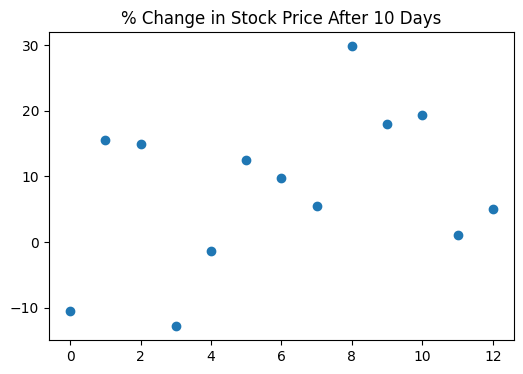

In [684]:
Y.plot(style="o", figsize=(6,4), title="% Change in Stock Price After 10 Days")
plt.show()

# Visually it's clear that regression is not a suitable learner for this data

In [685]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

In [686]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X = X_scaled

In [687]:
model = LinearRegression()
model.fit(X,Y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X)
print("MSE:", mean_squared_error(Y, y_pred))
print("MAE :", mean_absolute_error(Y, y_pred))

results = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values ,   # actual
    "y_pred": y_pred    # predicted
})
results["error"] = results["y_true"] - results["y_pred"]
results["abs_error"] = results["error"].abs()
results



Intercept: 0.4720705252242148
Coefficients: [ 1.31137390e+01 -2.09610107e-13  8.62621867e+01  2.89601478e+01
 -1.15230801e+02  2.87120837e+01]
MSE: 62.07406693328848
MAE : 6.582026551983412


,Company,y_true,y_pred,error,abs_error
0,Extendicare,-10.4,3.649501,-14.049501,14.049501
1,Canam Group,15.5,7.311947,8.188053,8.188053
2,CoolBrands,14.9,3.806488,11.093512,11.093512
3,ProMetic Life Sciences,-12.8,-5.862466,-6.937534,6.937534
4,DizA Resources,-1.4,4.137445,-5.537445,5.537445
5,MDC Partners,12.5,19.339866,-6.839866,6.839866
6,Gildan,9.8,8.349834,1.450166,1.450166
7,Sino-Forest,5.5,10.776772,-5.276772,5.276772
8,Sceptre,29.8,30.005973,-0.205973,0.205973
9,Goldcorp,18.0,4.314104,13.685896,13.685896


In [688]:
N_NEIGHBORS = 2

In [689]:
knn_model = KNeighborsRegressor(n_neighbors=N_NEIGHBORS)  
knn_model.fit(X, Y)
y_pred_knn = knn_model.predict(X)

print("MSE:", mean_squared_error(Y, y_pred_knn))
print("MAE:", mean_absolute_error(Y, y_pred_knn))

results_knn = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values,
    "y_pred": y_pred_knn
})
results_knn["error"] = results_knn["y_true"] - results_knn["y_pred"]
results_knn["abs_error"] = results_knn["error"].abs()
results_knn

MSE: 56.9048076923077
MAE: 6.273076923076924


,Company,y_true,y_pred,error,abs_error
0,Extendicare,-10.4,3.80,-14.20,14.20
1,Canam Group,15.5,15.20,0.30,0.30
2,CoolBrands,14.9,6.75,8.15,8.15
3,ProMetic Life Sciences,-12.8,-3.65,-9.15,9.15
4,DizA Resources,-1.4,6.75,-8.15,8.15
5,MDC Partners,12.5,8.75,3.75,3.75
6,Gildan,9.8,12.65,-2.85,2.85
7,Sino-Forest,5.5,2.05,3.45,3.45
8,Sceptre,29.8,23.90,5.90,5.90
9,Goldcorp,18.0,3.80,14.20,14.20


In [690]:
N_ESTIMATORS = 10

In [691]:
rf_model = RandomForestRegressor(n_estimators=N_ESTIMATORS, random_state=42)
rf_model.fit(X, Y)
y_pred_rf = rf_model.predict(X)

print("MSE:", mean_squared_error(Y, y_pred_rf))
print("MAE:", mean_absolute_error(Y, y_pred_rf))

results_rf = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values,
    "y_pred": y_pred_rf
})
results_rf["error"] = results_rf["y_true"] - results_rf["y_pred"]
results_rf["abs_error"] = results_rf["error"].abs()
results_rf


MSE: 17.423630769230765
MAE: 3.5646153846153843


,Company,y_true,y_pred,error,abs_error
0,Extendicare,-10.4,-4.92,-5.48,5.48
1,Canam Group,15.5,15.90,-0.40,0.40
2,CoolBrands,14.9,12.68,2.22,2.22
3,ProMetic Life Sciences,-12.8,-8.20,-4.60,4.60
4,DizA Resources,-1.4,4.98,-6.38,6.38
5,MDC Partners,12.5,13.93,-1.43,1.43
6,Gildan,9.8,10.46,-0.66,0.66
7,Sino-Forest,5.5,4.22,1.28,1.28
8,Sceptre,29.8,23.11,6.69,6.69
9,Goldcorp,18.0,13.87,4.13,4.13


In [692]:
importances = rf_model.feature_importances_
features = X.columns

feat_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(feat_importance_df)

                   Feature  Importance
3  Subordinate Voting (MM)    0.367031
4     Superior Voting (MM)    0.249501
2       Market Cap (C$ MM)    0.208405
5            Sup Vote/Econ    0.163026
0                 Coattail    0.012037
1                   Sunset    0.000000


In [693]:
MAX_DEPTH = 3

In [694]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=MAX_DEPTH)
dt_model.fit(X, Y)
y_pred_dt = dt_model.predict(X)

print("MSE:", mean_squared_error(Y, y_pred_dt))
print("MAE:", mean_absolute_error(Y, y_pred_dt))

results_dt = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values,
    "y_pred": y_pred_dt
})
results_dt["error"] = results_dt["y_true"] - results_dt["y_pred"]
results_dt["abs_error"] = results_dt["error"].abs()
results_dt

MSE: 13.462435897435897
MAE: 2.894871794871795


,Company,y_true,y_pred,error,abs_error
0,Extendicare,-10.4,-7.366667,-3.033333,3.033333
1,Canam Group,15.5,16.600000,-1.100000,1.100000
2,CoolBrands,14.9,16.600000,-1.700000,1.700000
3,ProMetic Life Sciences,-12.8,-7.366667,-5.433333,5.433333
4,DizA Resources,-1.4,2.050000,-3.450000,3.450000
5,MDC Partners,12.5,9.100000,3.400000,3.400000
6,Gildan,9.8,9.100000,0.700000,0.700000
7,Sino-Forest,5.5,2.050000,3.450000,3.450000
8,Sceptre,29.8,29.800000,0.000000,0.000000
9,Goldcorp,18.0,18.000000,0.000000,0.000000


In [695]:

"""
plt.figure(figsize=(20,10)) 
tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=9  
)
"""
#plt.savefig("dt.png", dpi=300, bbox_inches="tight") 
#plt.show()
#plt.close() 

'\nplt.figure(figsize=(20,10)) \ntree.plot_tree(\n    dt_model,\n    feature_names=X.columns,\n    filled=True,\n    rounded=True,\n    fontsize=9  \n)\n'

In [696]:
loo = LeaveOneOut()

models = {
    "LinearRegression": Pipeline([
        ("model", LinearRegression())
    ]),
    "KNN": Pipeline([
        ("model", KNeighborsRegressor(n_neighbors=N_NEIGHBORS))
    ]),
    "RandomForest": RandomForestRegressor(n_estimators=N_ESTIMATORS, random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42,max_depth=MAX_DEPTH)
}


mae_scores = {}
preds_by_model = {}

for name, mdl in models.items():
    y_pred = cross_val_predict(mdl, X, Y, cv=loo)
    preds_by_model[name] = y_pred
    mae = mean_absolute_error(Y, y_pred)
    mae_scores[name] = mae


print("LOOCV MAE by model:")
for name, mae in mae_scores.items():
    print(f"  {name:>14}: {mae:.4f}")

# (Optional) inspect per-point predictions for a model
# results = pd.DataFrame({"y_true": Y.values, "y_pred": preds_by_model["RandomForest"]})
# results["abs_err"] = (results["y_true"] - results["y_pred"]).abs()
# print(results)


LOOCV MAE by model:
  LinearRegression: 35.9120
             KNN: 11.2308
    RandomForest: 10.9708
    DecisionTree: 14.1396


# Inference

In [711]:
MAGNA

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
14,Magna,0,0,7379.0,111.9,0.7,102.4,NaN


In [712]:
#MAGNA_X = MAGNA.iloc[:,1:-1]
MAGNA_X = MAGNA.loc[MAGNA["Company"]=="Magna", X.columns]
MAGNA_SCALED = pd.DataFrame(scaler.transform(MAGNA_X),columns=X.columns)

In [713]:
rf_pred = rf_model.predict(MAGNA_SCALED)
knn_pred = knn_model.predict(MAGNA_SCALED)
reg_pred = model.predict(MAGNA_SCALED)
print(f"RF: {rf_pred}")
print(f"KNN: {knn_pred}")
print(f"Regression: {reg_pred}")

RF: [5.53]
KNN: [3.8]
Regression: [117.1009882]


In [718]:
distances, indices = knn_model.kneighbors(MAGNA_SCALED, n_neighbors=len(X_scaled))

print("Neighbor ordering by distance:")
for rank, (idx, dist) in enumerate(zip(indices[0], distances[0]), start=1):
    print(f"{rank}. {data.iloc[idx]['Company']}, Distance={dist:.3f}, 10 Day Stock Change %={Y.iloc[idx]}")

Neighbor ordering by distance:
1. Extendicare, Distance=0.966, 10 Day Stock Change %=-10.4
2. Goldcorp, Distance=1.119, 10 Day Stock Change %=18.0
3. Laidlaw, Distance=1.182, 10 Day Stock Change %=1.1
4. MDS Inc., Distance=1.420, 10 Day Stock Change %=19.4
5. Gildan, Distance=1.549, 10 Day Stock Change %=9.8
6. Canam Group, Distance=1.552, 10 Day Stock Change %=15.5
7. Sino-Forest, Distance=1.555, 10 Day Stock Change %=5.5
8. MDC Partners, Distance=1.576, 10 Day Stock Change %=12.5
9. Sceptre, Distance=1.576, 10 Day Stock Change %=29.8
10. DizA Resources, Distance=1.596, 10 Day Stock Change %=-1.4
11. ProMetic Life Sciences, Distance=1.597, 10 Day Stock Change %=-12.8
12. CoolBrands, Distance=1.597, 10 Day Stock Change %=14.9
13. Slater Steel, Distance=1.616, 10 Day Stock Change %=5.0


KNN makes the most sense